In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/Diwali Sales Data.csv', encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(columns =['Status', 'unnamed1'], inplace = True)

KeyError: "['Status', 'unnamed1'] not found in axis"

In [13]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [11]:
repvalue = df['Amount'].mean()

In [18]:
df = df.rename(columns = {'Amount': 'Sales'})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11251 non-null  int64 
 1   Cust_name         11251 non-null  object
 2   Product_ID        11251 non-null  object
 3   Gender            11251 non-null  object
 4   Age Group         11251 non-null  object
 5   Age               11251 non-null  int64 
 6   Marital_Status    11251 non-null  int64 
 7   State             11251 non-null  object
 8   Zone              11251 non-null  object
 9   Occupation        11251 non-null  object
 10  Product_Category  11251 non-null  object
 11  Orders            11251 non-null  int64 
 12  Sales             11251 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [22]:
df['Sales'] = df['Sales'].astype(int)

-	Count the number of Male and Female with Labels

In [38]:
G = df.groupby('Gender')['Gender'].count()
G = pd.DataFrame(G)
G = G.rename(columns = {'Gender': 'Gcount'})
G = G.sort_values(by = ['Gcount'], ascending = [False])

<ipython-input-37-1beb25f5e145>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  var = sns.countplot(x= df['Gender'], palette ='viridis')


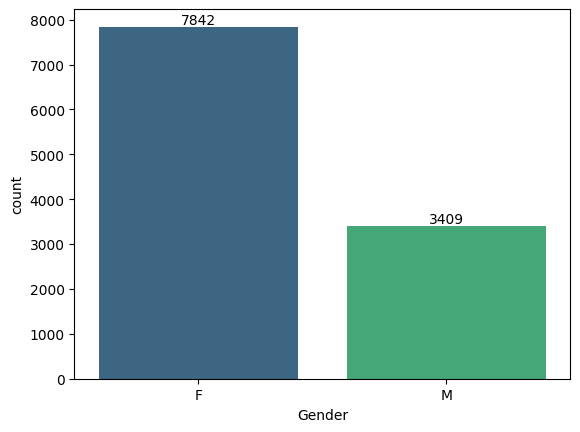

In [37]:
import seaborn as sns
var = sns.countplot(x= df['Gender'], palette ='viridis')

for bars in var.containers:
  var.bar_label(bars)

-	Give the sales by gender and sort in descending order & plot bar graph (with Lables)

In [59]:
xx = df.groupby('Gender')['Sales'].sum().reset_index()
xx

,Gender,Sales
0,F,74430383
1,M,31932182


<ipython-input-116-896e93ff6e06>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  var1 = sns.barplot(x=xx['Gender'], y = xx['Sales'], palette = 'PRGn')


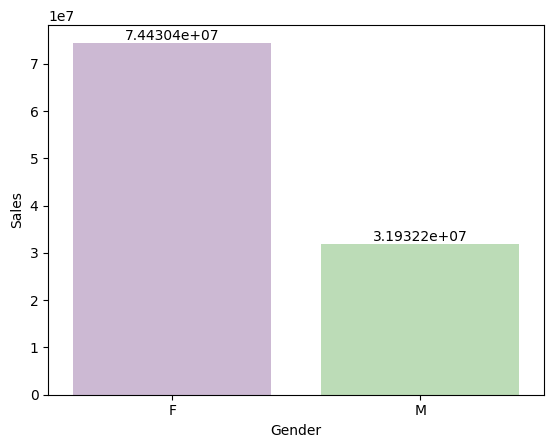

In [116]:
var1 = sns.barplot(x=xx['Gender'], y = xx['Sales'], palette = 'PRGn')

for bars in var1.containers:
  var1.bar_label(bars)

**find Sales by each Age groups by their Gender (With Label)**

In [64]:
yy = df.groupby(['Age Group','Gender'])['Sales'].sum().reset_index()

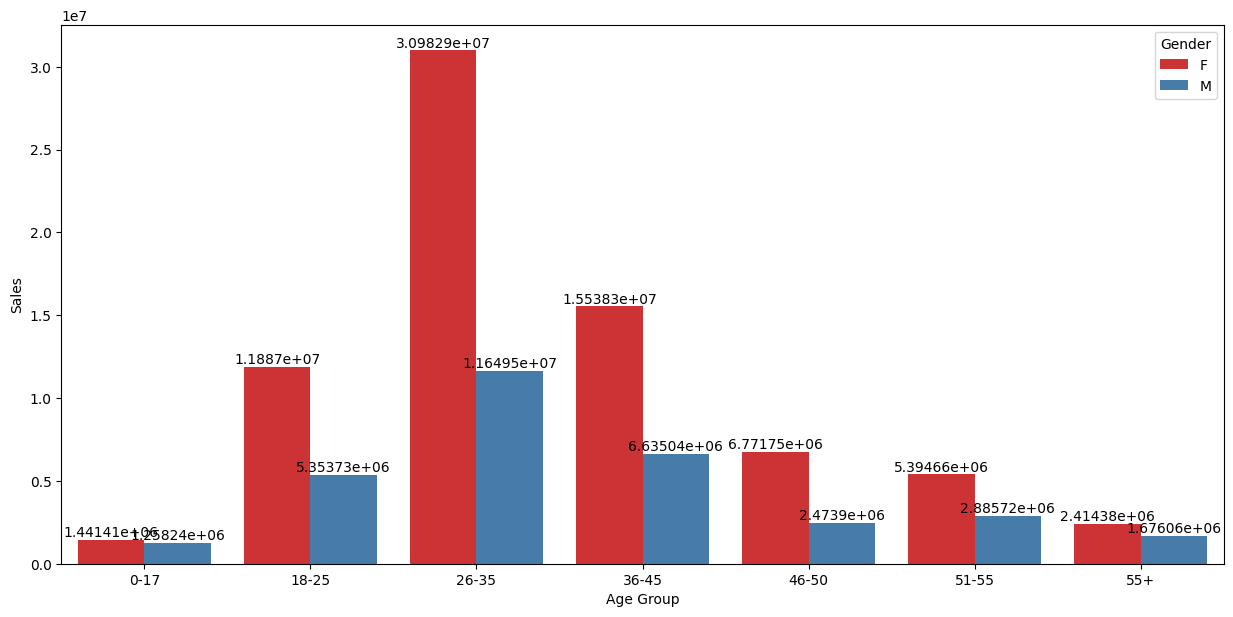

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
var2 = sns.barplot(x = yy['Age Group'], y =yy['Sales'], hue = yy['Gender'], palette = 'Set1')
for bars in var2.containers:
  var2.bar_label(bars)

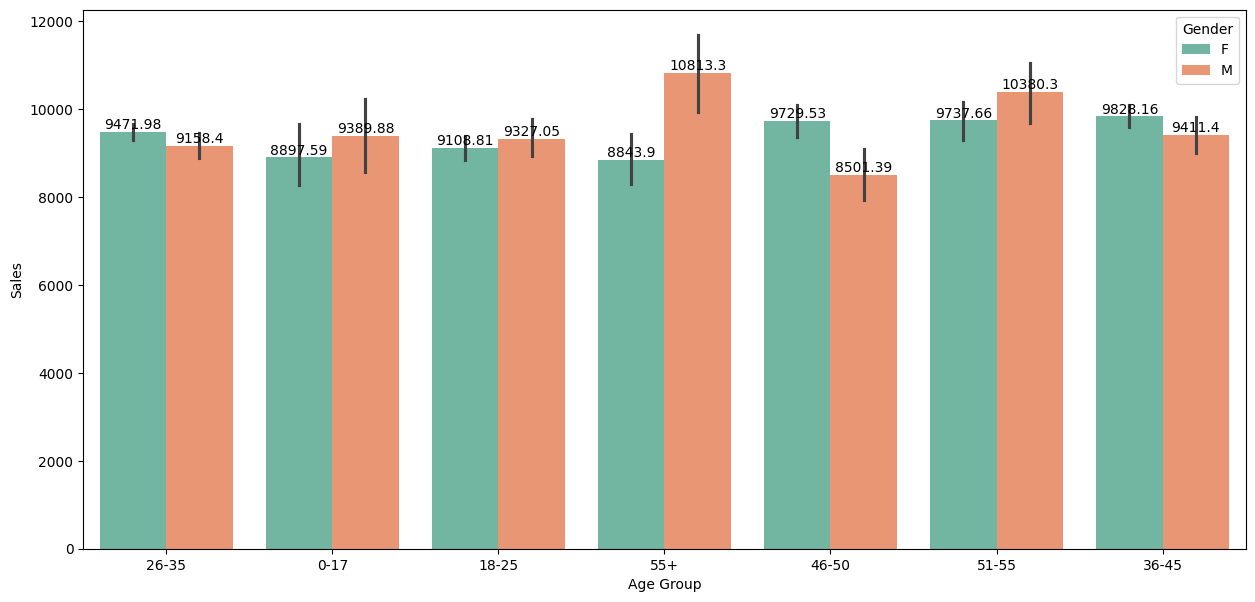

In [86]:
# PER TRANSACTION VALUE SPEND BY GENDER TYPE IN EACH AGE GROUP

plt.figure(figsize=(15,7))
z = sns.barplot(x = df['Age Group'], y =df['Sales'], hue = df['Gender'], palette = 'Set2')

for bars in z.containers:
  z.bar_label(bars)

**-	Total orders from Top 10 states**

In [117]:
zz = df.groupby('State')['Orders'].sum().reset_index()
zz = zz.sort_values(by = 'Orders', ascending = False).head(10)

<ipython-input-118-f78d42311eeb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  var3 = sns.barplot(x = zz['State'], y = zz['Orders'],palette = 'viridis')


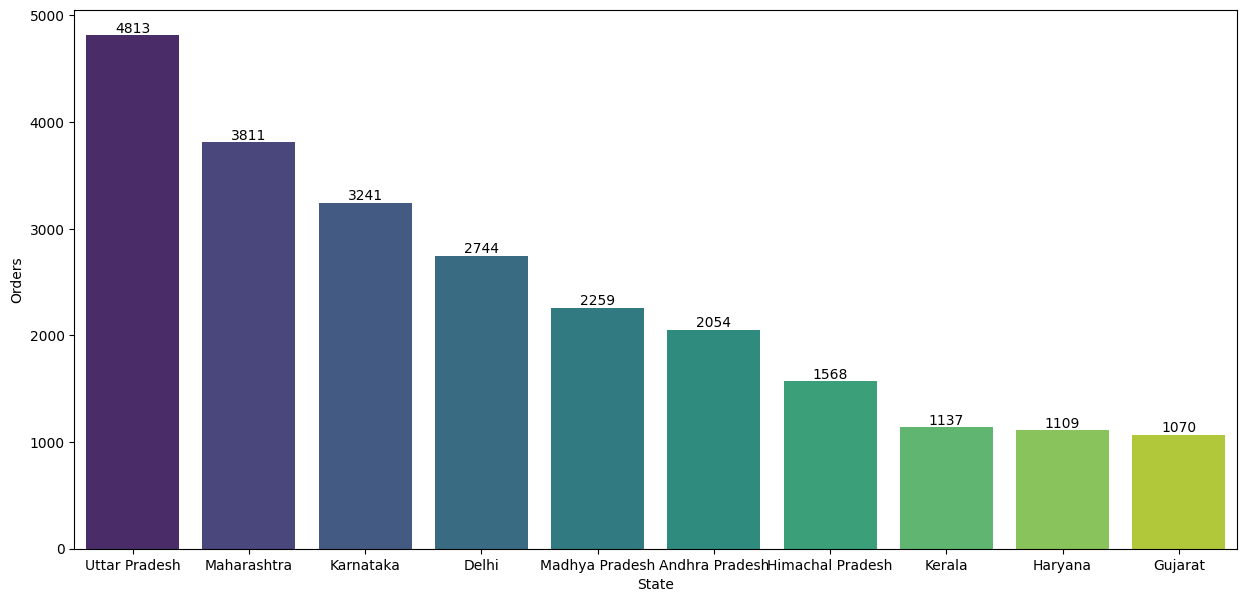

In [118]:
plt.figure(figsize=(15,7))
var3 = sns.barplot(x = zz['State'], y = zz['Orders'],palette = 'viridis')

for bars in var3.containers:
  var3.bar_label(bars)

<ipython-input-114-61d2f6744a9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  var4 = sns.barplot(x = zzz['State'], y = zzz['Sales'],palette = 'RdYlBu')


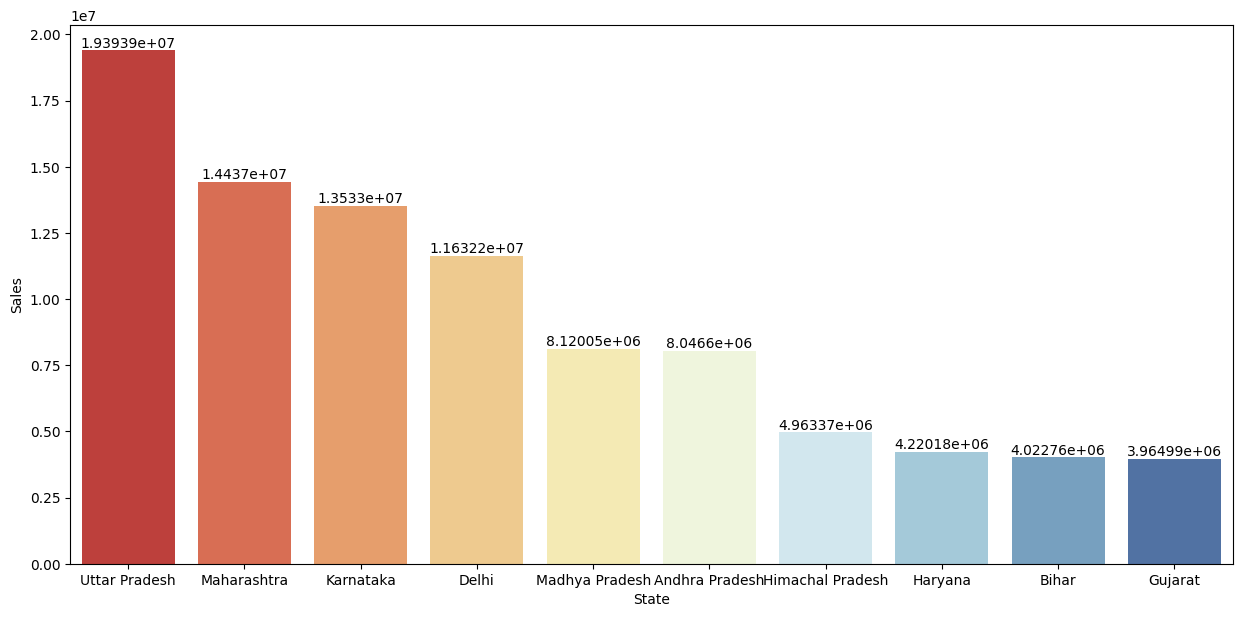

In [114]:
zzz = df.groupby('State')['Sales'].sum().reset_index()
zzz = zzz.sort_values(by = 'Sales', ascending = False).head(10)


plt.figure(figsize=(15,7))
var4 = sns.barplot(x = zzz['State'], y = zzz['Sales'],palette = 'RdYlBu')

for bars in var4.containers:
  var4.bar_label(bars)


***-	Count of Martial Status with graph ***

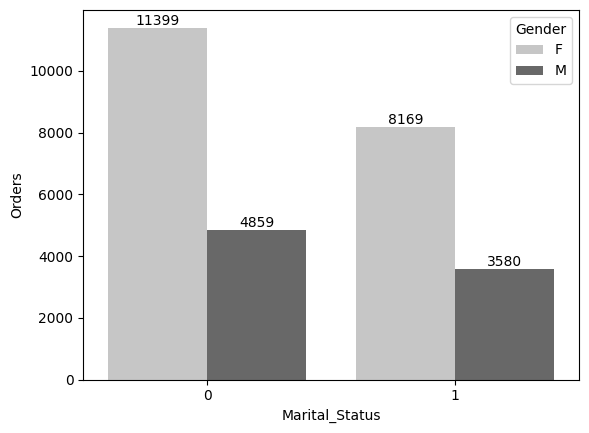

In [133]:
ww = df.groupby(['Marital_Status', 'Gender'])['Orders'].sum().reset_index().sort_values(by = 'Orders', ascending = False)
var5 = sns.barplot(x = ww['Marital_Status'], y = ww['Orders'], hue = ww['Gender'], palette = 'Greys')

for bars in var5.containers:
  var5.bar_label(bars)

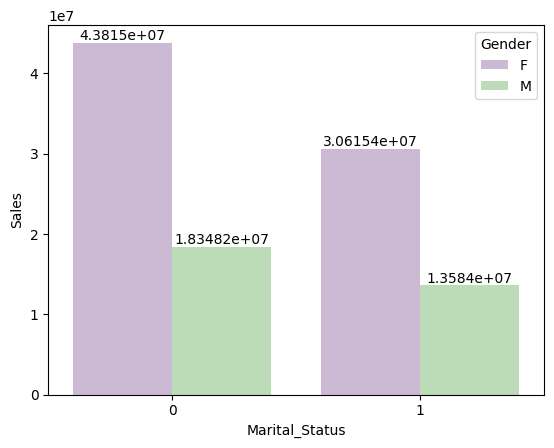

In [138]:
vv = df.groupby(['Marital_Status', 'Gender'])['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)
var6 = sns.barplot(x = vv['Marital_Status'], y = vv['Sales'], hue = vv['Gender'], palette = 'PRGn')

for bars in var6.containers:
  var6.bar_label(bars)

**-	Count of orders by occupation**

In [181]:
uu = df.groupby(['Occupation', 'Gender'])['Orders'].sum().reset_index().sort_values(by = 'Orders', ascending = False)
uu

,Occupation,Gender,Orders
20,IT Sector,F,2701
16,Healthcare,F,2403
4,Aviation,F,2302
6,Banking,F,2034
14,Govt,F,1507
21,IT Sector,M,1309
18,Hospitality,F,1183
24,Media,F,1069
17,Healthcare,M,1052
26,Retail,F,958


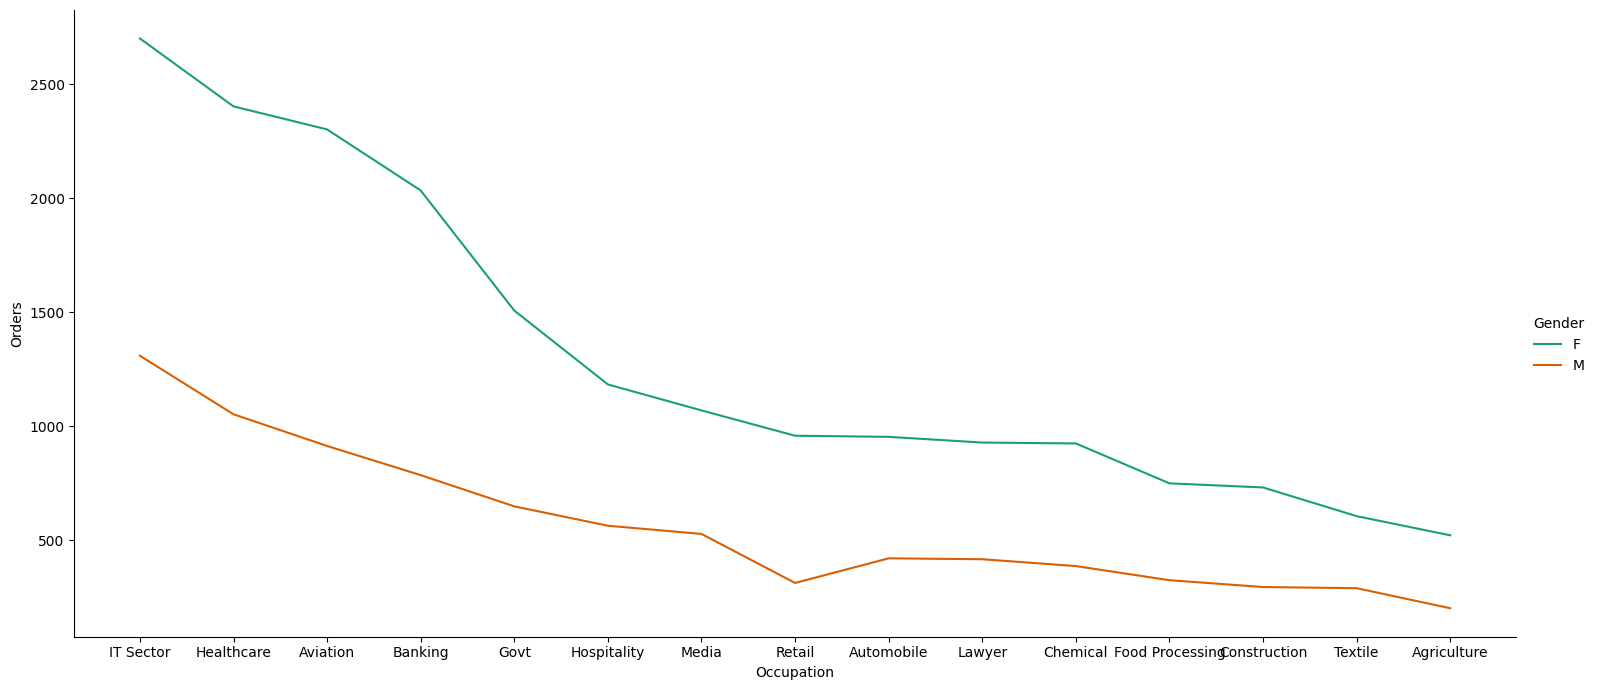

In [182]:
var7 = sns.relplot(x = uu['Occupation'], y = uu['Orders'], kind = 'line', hue = uu['Gender'], palette = 'Dark2', height = 7, aspect = 2.2)

In [280]:
df1 = df.groupby(['Occupation', 'Gender'])['Sales'].sum().reset_index()
df1 = df1.sort_values(by = 'Sales', ascending = False)

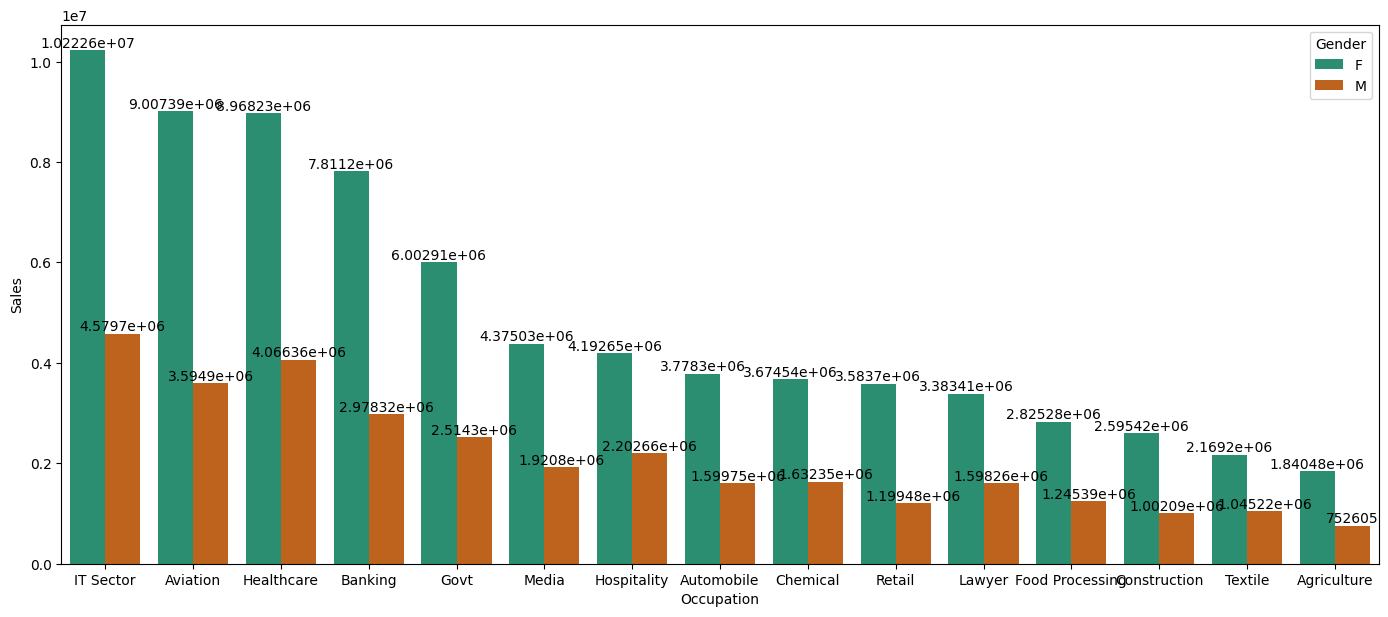

In [282]:
plt.figure(figsize = (17,7))
var8 = sns.barplot(x = df1['Occupation'],y = df1['Sales'], hue = df1['Gender'],palette = 'Dark2')

for bars in var8.containers:
  var8.bar_label(bars)

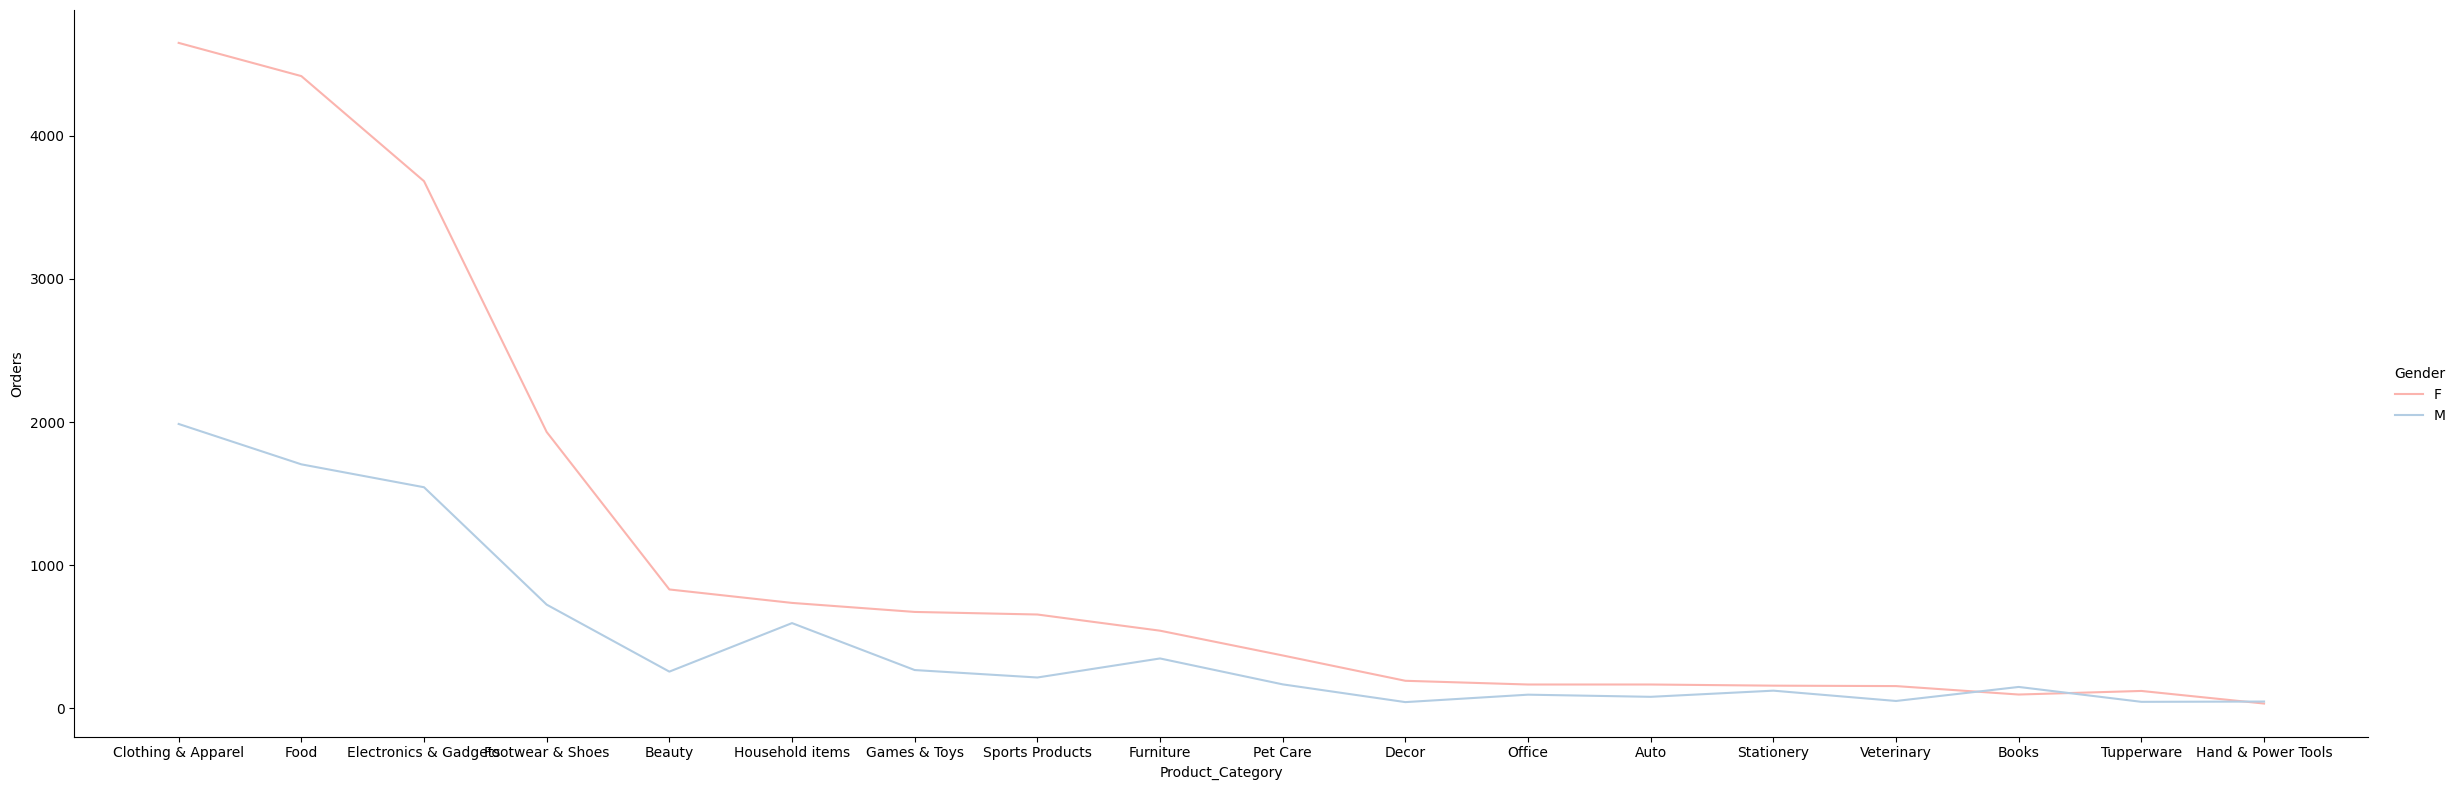

In [296]:
df2 = df.groupby(['Product_Category', 'Gender'])['Orders'].sum().reset_index().sort_values(by = 'Orders', ascending = False )

sns.relplot(x = 'Product_Category', y = 'Orders', data = df2, kind = 'line', hue = 'Gender', palette = 'Pastel1', height = 8, aspect = 3 )

<Axes: xlabel='Product_Category', ylabel='Sales'>

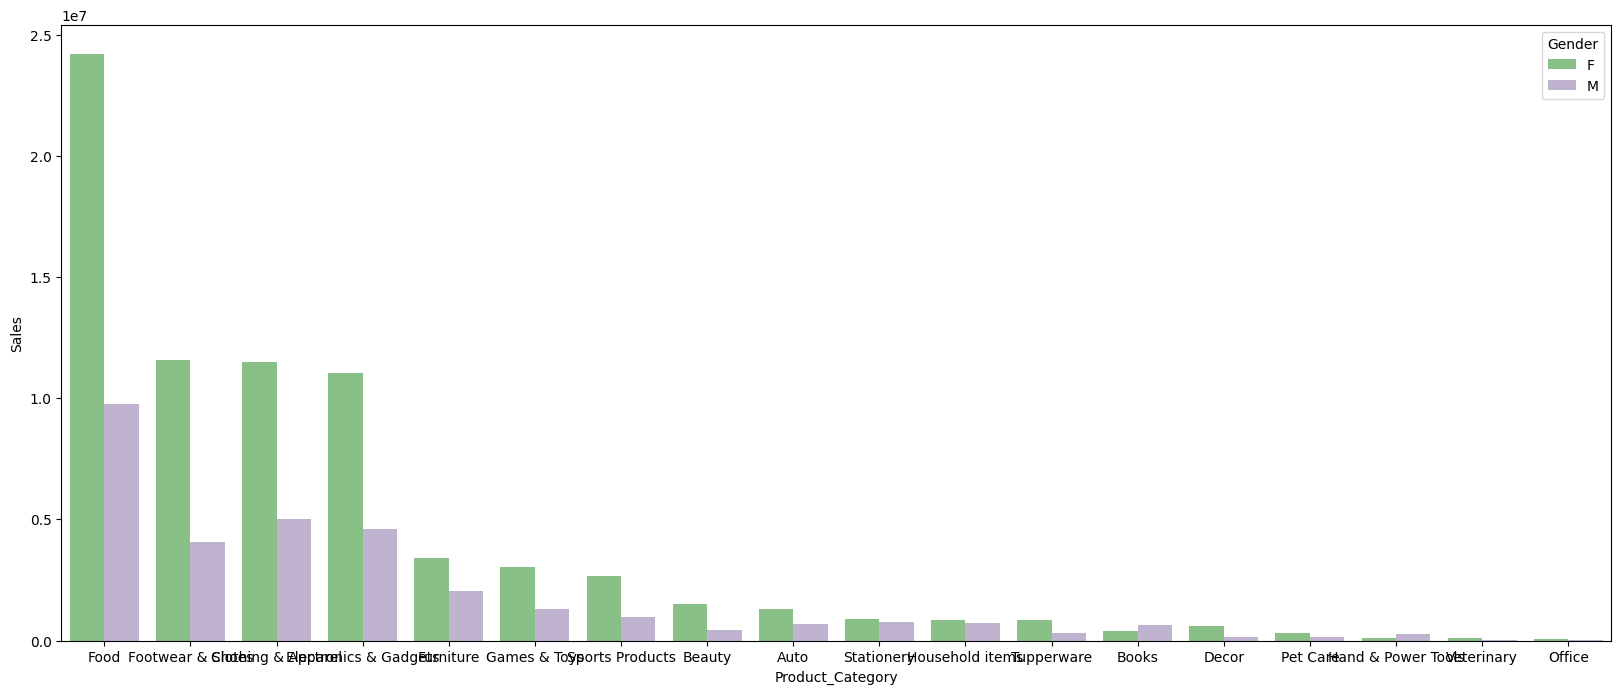

In [304]:
df3 = df.groupby(['Product_Category', 'Gender'])['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False )

plt.figure(figsize=(20,8))

sns.barplot(x = 'Product_Category', y = 'Sales', data = df3, hue = 'Gender', palette = 'Accent')